In [1]:
import ipywidgets as ip

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 8.0)
import numpy as np
import uncertainties as u
from uncertainties import unumpy
import math as math

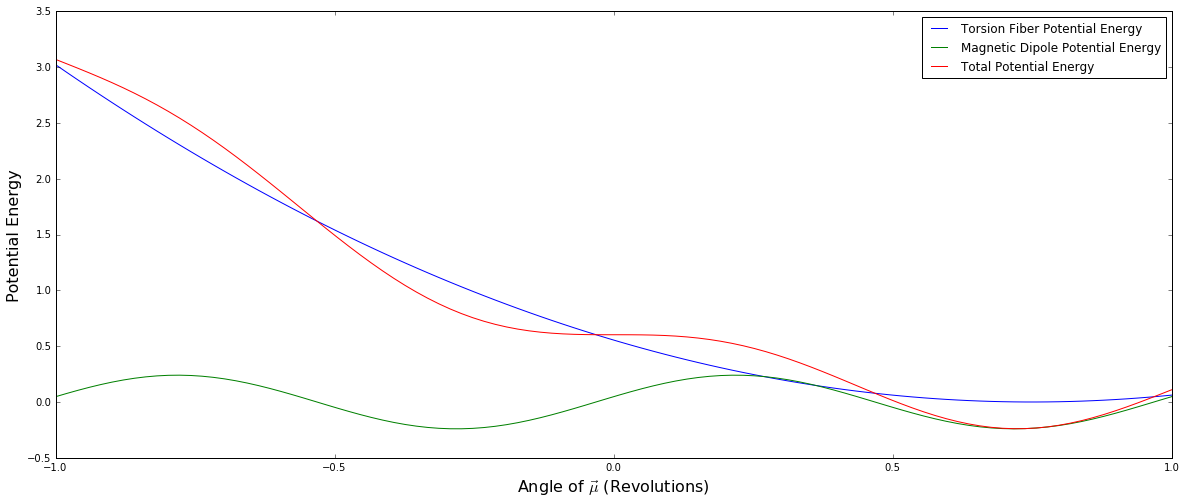

-4.71239


In [34]:
pi = np.pi

def calc_zero_equilibrium(torsionZero, Bparr):
    steps = 100 # resolution. (number of points to calculate)
    # setup the angle array that we will use as our independant variable:
    alpha = np.linspace(-2*pi, 2*pi, steps)
    kappa = .05 # torsion constant should have units of (N m / rad) (kg m^2 s^-2 rad^-1)
    mu = .05 # magnetic moment
    # calculate the perpendicular field required to hold the dipole against the fiber
    Bperp = (-kappa* torsionZero)/(mu) 
    # calculate the total magnetic field
    Bmag = (Bperp**2 + Bparr**2)**(1/2)
    Bdir = np.arctan2(Bperp, Bparr) # take the angle from the two components of the field
    
    # calculate the potential energies:
    torsionFiberPotentialEnergy = (1/2)*kappa*(alpha - torsionZero)**2
    
    # dipole potential
    magneticDipolePotentialEnergy = -1 * mu * Bmag * np.cos( alpha - Bdir )
        
    # total potental energy
    totalPotentialEnergy = torsionFiberPotentialEnergy + magneticDipolePotentialEnergy
    
    plt.plot(alpha/(2*pi), torsionFiberPotentialEnergy, label='Torsion Fiber Potential Energy') # plot all the energies
    plt.plot(alpha/(2*pi), magneticDipolePotentialEnergy, label='Magnetic Dipole Potential Energy')
    plt.plot(alpha/(2*pi), totalPotentialEnergy, label='Total Potential Energy')
    
    plt.xlabel('Angle of $\\vec{\mu}$ (Revolutions)', size=16)
    plt.ylabel('Potential Energy', size=16)
    plt.legend()
    
    plt.show()
    print(Bperp)
    
    
# now interface stuff
ip.interact(calc_zero_equilibrium,
            torsionZero=(-4*pi, 4*pi, pi/6), 
            Bparr=(-5,5,0.05))